# Before you start :
   - These exercises are related to the Subsetting and Descriptive Stats lessons.
   - Keep in mind that you need to use some of the functions you learned in the previous lessons.
   - All datasets are provided in the `your-code` folder of this lab.
   - Elaborate your codes and outputs as much as you can.
   - Try your best to answer the questions and complete the tasks and most importantly enjoy the process!!!

#### Import all the libraries that are necessary

In [1]:
# import libraries here
import numpy as np
import pandas as pd

# Challenge 1

#### In this challenge we will use the `Temp_States.csv` file. 

#### First import it into a data frame called `temp`.

In [2]:
# your answer here
temp = pd.read_csv("Temp_States.csv")


#### Print `temp`

In [3]:
print(temp)

         City        State  Temperature
0         NYC     New York    19.444444
1      Albany     New York     9.444444
2     Buffalo     New York     3.333333
3    Hartford  Connecticut    17.222222
4  Bridgeport  Connecticut    14.444444
5      Treton   New Jersey    22.222222
6      Newark   New Jersey    20.000000


#### Explore the data types of the Temp dataframe. What type of data do we have? Comment your result.

In [16]:
# your answer here
temp.dtypes
#Tenemos ciudades, obviamente en string; estados en el mismo formato y temperatura en float64.

City            object
State           object
Temperature    float64
dtype: object

#### Select the rows where state is New York

In [10]:
# your answer here
print(temp[temp.State=="New York"].index)

Int64Index([0, 1, 2], dtype='int64')


#### What is the average of the temperature of cities in New York?

In [28]:
# your answer here
temp.iloc[0:3,2].mean() #esta es una forma de hacerlo
print(temp[temp['State']=='New York'].mean()) #esta es otra


Temperature    10.740741
dtype: float64


#### We want to know cities and states with Temperature above 15 degress Celcius

In [27]:
# your answer here
print(temp[['City', 'State']][temp.Temperature>15])

       City        State
0       NYC     New York
3  Hartford  Connecticut
5    Treton   New Jersey
6    Newark   New Jersey


#### Now, return only the cities that have a temperature above 15 degress Celcius

In [44]:
# your answer here
temp[['City']][temp.Temperature>15]

,City
0,NYC
3,Hartford
5,Treton
6,Newark


#### We want to know which cities have a temperature above 15 degrees Celcius and below 20 degrees Celcius

*Hint: First write the condition then select the rows.*

In [33]:
# your answer here
print(temp[['City','Temperature']][(temp.Temperature>15) & (temp.Temperature<20)])

       City  Temperature
0       NYC    19.444444
3  Hartford    17.222222


#### Find the mean and the standard deviation of the temperature of each state.

*Hint: Use functions from Data Manipulation lesson*

In [40]:
# your answer here
x = temp.groupby('State').agg({'Temperature':'std'})
print(x)


             Temperature
State                   
Connecticut     1.964186
New Jersey      1.571348
New York        8.133404


In [41]:
y = temp.groupby('State').agg({'Temperature':'mean'})
print(y)

             Temperature
State                   
Connecticut    15.833333
New Jersey     21.111111
New York       10.740741


# Challenge 2

#### Load the `employee.csv` file into a DataFrame. Call the dataframe `employee`

In [46]:
# your answer here
employee = pd.read_csv("Employee.csv")
print(employee.head())

     Name Department Education Gender      Title  Years  Salary
0    Jose         IT  Bachelor      M    analyst      1      35
1   Maria         IT    Master      F    analyst      2      30
2   David         HR    Master      M    analyst      2      30
3   Sonia         HR  Bachelor      F    analyst      4      35
4  Samuel      Sales    Master      M  associate      3      55


#### Explore the data types of the Temp dataframe. Comment your results

In [47]:
# your answer here
print(employee.dtypes)
#AS expected, categorical variables are in string format, while years and salary are int64.

Name          object
Department    object
Education     object
Gender        object
Title         object
Years          int64
Salary         int64
dtype: object


#### Show visually the frequency distribution (histogram) of the employee dataset. In few words describe these histograms?

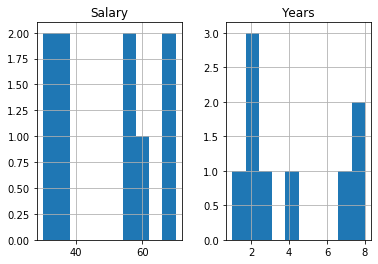

In [50]:
# your answer here
employee.hist();
#We see that the majority of employees earn less than 40k a year. 
#On the other hand, most people have between 1-2 years of experience. 

#### What's the average salary in this company?

In [52]:
# your answer here
employee.Salary.mean()

48.888888888888886

#### What's the highest salary?

In [53]:
# your answer here
employee.Salary.max()

70

#### What's the lowest salary?

In [55]:
# your answer here
employee.Salary.min()

30

#### Who are the employees with the lowest salary?

In [57]:
# your answer here
print(employee['Name'][employee.Salary < employee.Salary.mean()]) #the 4 losers.

0     Jose
1    Maria
2    David
3    Sonia
Name: Name, dtype: object


#### Could you give all the information about an employee called David?

In [58]:
#Yes I can.
print(employee[employee.Name=="David"])

    Name Department Education Gender    Title  Years  Salary
2  David         HR    Master      M  analyst      2      30


#### Could you give only David's salary?

In [64]:
#yes, sir.
print(employee.Salary[employee.Name=="David"])


2    30
Name: Salary, dtype: int64


#### Print all the rows where job title is associate

In [65]:
# your answer here
print(employee[employee.Title=='associate'])

     Name Department Education Gender      Title  Years  Salary
4  Samuel      Sales    Master      M  associate      3      55
5     Eva      Sales  Bachelor      F  associate      2      55
7   Pedro         IT       Phd      M  associate      7      60


#### Print the first 3 rows of your dataframe

##### Tip : There are 2 ways to do it. Do it both ways

In [66]:
# your answer here- 1 method
print(employee.head(3))

    Name Department Education Gender    Title  Years  Salary
0   Jose         IT  Bachelor      M  analyst      1      35
1  Maria         IT    Master      F  analyst      2      30
2  David         HR    Master      M  analyst      2      30


In [72]:
# your answer here- 2nd method
print(employee.iloc[:3])


    Name Department Education Gender    Title  Years  Salary
0   Jose         IT  Bachelor      M  analyst      1      35
1  Maria         IT    Master      F  analyst      2      30
2  David         HR    Master      M  analyst      2      30


#### Find the employees who's title is associate and the salary above 55?

In [73]:
#No need to put a question mark on a command...
print(employee[(employee.Title=='associate')&(employee.Salary>55)])


    Name Department Education Gender      Title  Years  Salary
7  Pedro         IT       Phd      M  associate      7      60


#### Group the employees based on their number of years of employment. What are the average salaries in each group?

In [74]:
# your answer here
x = employee.groupby('Years').agg({'Salary':'mean'})
print(x)

          Salary
Years           
1      35.000000
2      38.333333
3      55.000000
4      35.000000
7      60.000000
8      70.000000


####  What is the average Salary per title?

In [75]:
# your answer here
x = employee.groupby('Title').agg({'Salary':'mean'})
print(x)

              Salary
Title               
VP         70.000000
analyst    32.500000
associate  56.666667


#### Show a visual summary of the data using boxplot. What Are the First and Third Quartiles? Comment your results.
##### * Hint : Quantiles vs Quartiles*
##### - `In Probability and Statistics, quantiles are cut points dividing the range of a probability distribution into continuous intervals with equal probabilities. When division is into four parts the values of the variate corresponding to 25%, 50% and 75% of the total distribution are called quartiles.`

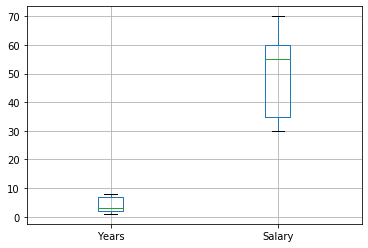

In [77]:
# draw boxplot here
employee.boxplot();

In [78]:
# print first quartile here
employee.quantile(.25)

Years      2.0
Salary    35.0
Name: 0.25, dtype: float64

In [79]:
# print third quartile here
employee.quantile(.75)

Years      7.0
Salary    60.0
Name: 0.75, dtype: float64

#### Is the mean salary per gender different?

In [80]:
# It is different :( 
y = employee.groupby('Gender').agg({'Salary':'mean'})
print(y)

        Salary
Gender        
F         47.5
M         50.0


#### Find the minimum, mean and the maximum of all numeric columns for each Department.

##### Hint: Use functions from Data Manipulation lesson

In [87]:
# your answer here
x = employee.groupby('Department').agg({'Salary':'mean','Years':'mean'})
x = employee.groupby('Department').agg({'Salary':'min','Years':'min'})
x = employee.groupby('Department').agg({'Salary':'max','Years':'max'})

print(x)

            Salary  Years
Department               
HR              70      8
IT              70      8
Sales           55      3


### Bonus Question

#### For each department, compute the difference between the maximal salary and the minimal salary.

##### * Hint: try using `agg` or `apply` and `lambda`*

In [92]:
# your answer here
x = employee.groupby('Department').agg({'Salary': 'max'})
y = employee.groupby('Department').agg({'Salary': 'min'})
z = x-y
print(x)
print(y)
print(z)


            Salary
Department        
HR              70
IT              70
Sales           55
            Salary
Department        
HR              30
IT              30
Sales           55
            Salary
Department        
HR              40
IT              40
Sales            0


# Challenge 3

#### Open the Orders.csv dataset. Name your dataset orders

In [100]:
# your answer here
orders = pd.read_csv("Orders.zip")
orders.head()

,Unnamed: 0,InvoiceNo,StockCode,year,month,day,hour,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,amount_spent
0,0,536365,85123A,2010,12,3,8,white hanging heart t-light holder,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,15.30
1,1,536365,71053,2010,12,3,8,white metal lantern,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
2,2,536365,84406B,2010,12,3,8,cream cupid hearts coat hanger,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,22.00
3,3,536365,84029G,2010,12,3,8,knitted union flag hot water bottle,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
4,4,536365,84029E,2010,12,3,8,red woolly hottie white heart.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34


#### Explore your dataset by looking at the data types and the summary statistics. Comment your results

In [101]:
# your answer here
orders.dtypes
#Plenty of info; some of it is clearly categorical (description, country), other is clearly
#numerical (quantity,price, amount_spent), while the dates are sometimes in int64 and sometimes in string. 

Unnamed: 0        int64
InvoiceNo         int64
StockCode        object
year              int64
month             int64
day               int64
hour              int64
Description      object
Quantity          int64
InvoiceDate      object
UnitPrice       float64
CustomerID        int64
Country          object
amount_spent    float64
dtype: object

In [102]:
# your answer here
orders.describe()
#there's plenty of vwariance in quantity and amount spent; look at the min and the max... 

,Unnamed: 0,InvoiceNo,year,month,day,hour,Quantity,UnitPrice,CustomerID,amount_spent
count,397924.000000,397924.000000,397924.000000,397924.000000,397924.000000,397924.000000,397924.000000,397924.000000,397924.000000,397924.000000
mean,278465.221859,560617.126645,2010.934259,7.612537,3.614555,12.728247,13.021823,3.116174,15294.315171,22.394749
std,152771.368303,13106.167695,0.247829,3.416527,1.928274,2.273535,180.420210,22.096788,1713.169877,309.055588
min,0.000000,536365.000000,2010.000000,1.000000,1.000000,6.000000,1.000000,0.000000,12346.000000,0.000000
25%,148333.750000,549234.000000,2011.000000,5.000000,2.000000,11.000000,2.000000,1.250000,13969.000000,4.680000
50%,284907.500000,561893.000000,2011.000000,8.000000,3.000000,13.000000,6.000000,1.950000,15159.000000,11.800000
75%,410079.250000,572090.000000,2011.000000,11.000000,5.000000,14.000000,12.000000,3.750000,16795.000000,19.800000
max,541908.000000,581587.000000,2011.000000,12.000000,7.000000,20.000000,80995.000000,8142.750000,18287.000000,168469.600000


####  What is the average Purchase Price?

In [103]:
# your answer here
orders.UnitPrice.mean()

3.1161744805540756

#### What were the highest and lowest purchase prices? 

In [104]:
# your answer here
orders.UnitPrice.min()

0.0

In [105]:
# your answer here
orders.UnitPrice.max()

8142.75

#### Select all the customers we have in Spain

In [114]:
# your answer here
amigos_de_Yona = orders.CustomerID[orders.Country=='Spain']
amigos_de_Yona

4250      12557
4251      12557
4252      12557
4253      12557
4254      12557
          ...  
394733    17097
394734    17097
394735    17097
394736    17097
394737    17097
Name: CustomerID, Length: 2485, dtype: int64

#### How many customers do we have in Spain?
##### Hint : Use value_counts()

In [116]:
# your answer here
amigos_de_Yona.value_counts().sum()
#Yona has a lot of friends.

2485

#### Select all the customers who have bought more than 50 items ?

In [117]:
# your answer here
y = orders.CustomerID[orders.Quantity>50]
print(y)

46        13748
83        15291
96        14688
102       14688
174       16029
          ...  
397720    18102
397721    16626
397729    16626
397761    15311
397882    13777
Name: CustomerID, Length: 11609, dtype: int64


#### Select orders from Spain that are above 50 items

In [121]:
# Cuando dicen "select orders", no sé a qué variable quieren que seleccione, por eso elegí CustomerID
amigos_ricos_de_Yona = orders.CustomerID[(orders.Quantity>50) & (orders.Country=='Spain')]
amigos_ricos_de_Yona.value_counts().sum()

39

#### Select all free orders

In [126]:
# your answer here
free = orders[orders.UnitPrice==0]
free.CustomerID.value_counts().sum()

40

#### Select all orders that are 'lunch bag'
#### Hint: Use string functions

In [152]:
# your answer here
def find_lunch(s):
    s = str(s)
    s = s.lower()
    if "lunch" in s:
        s="lunch bag"
    return s
     
copy = orders.copy()
copy.Description = copy.Description.apply(find_lunch)
print(copy.Country[copy.Description=="lunch bag"].value_counts())

#qué onda el éxito de los lunch bags en Inglaterra..

United Kingdom          12933
France                    635
Germany                   361
Netherlands               195
Belgium                   156
EIRE                      152
Portugal                   92
Spain                      92
Australia                  75
Switzerland                66
Channel Islands            33
Denmark                    31
Italy                      29
Austria                    17
Canada                     13
Norway                     12
Sweden                      9
Israel                      8
Japan                       7
Cyprus                      5
Greece                      4
Brazil                      4
Finland                     3
RSA                         3
United Arab Emirates        2
Unspecified                 1
USA                         1
Poland                      1
Name: Country, dtype: int64


#### Select all orders that are made in 2011 and are 'lunch bag'  

In [155]:
# your answer hereprint
lunch_2011 = copy.Country[(copy.Description=="lunch bag") & (copy.year==2011)].value_counts()
lunch_2011
#buen año para vender lunch bags!

United Kingdom          12454
France                    603
Germany                   356
Netherlands               189
Belgium                   154
EIRE                      151
Spain                      86
Portugal                   83
Australia                  74
Switzerland                62
Channel Islands            33
Denmark                    31
Italy                      29
Austria                    17
Canada                     13
Norway                     12
Sweden                      9
Israel                      8
Japan                       6
Cyprus                      5
Greece                      4
Brazil                      4
Finland                     3
RSA                         3
United Arab Emirates        2
Unspecified                 1
USA                         1
Poland                      1
Name: Country, dtype: int64

#### Show the frequency distribution of the amount spent in Spain.

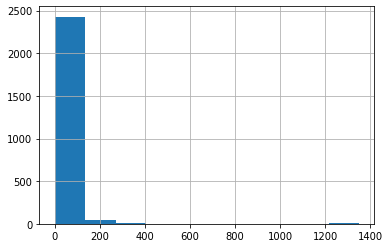

In [134]:
# your answer here
amigos_de_Yona = orders['amount_spent'][orders.Country=='Spain']
amigos_de_Yona.hist();

#### Select all orders made in the month of August

In [138]:
# your answer here
august = orders[orders.month==8]

#### Select how many orders are made by countries in the month of August
##### Hint: Use value_counts()

In [139]:
# your answer here
print(august.Country.value_counts())

United Kingdom     23105
Germany              795
EIRE                 593
France               569
Netherlands          280
Switzerland          267
Spain                252
Belgium              194
Israel               171
Channel Islands      140
Australia            107
Italy                 95
Austria               88
Norway                77
Finland               61
Malta                 55
Portugal              41
Sweden                40
Unspecified           23
Iceland               22
Poland                17
Denmark               16
Canada                 5
Name: Country, dtype: int64


#### What's the  average amount of money spent by country

In [140]:
# your answer here
avg_country = orders.groupby("Country").agg({'amount_spent':'mean'})
avg_country

,amount_spent
Country,
Australia,116.895620
Austria,25.624824
Bahrain,32.258824
Belgium,20.283772
Brazil,35.737500
Canada,24.280662
Channel Islands,27.340160
Cyprus,22.134169
Czech Republic,33.069600


#### What's the most expensive item?

In [141]:
# your answer here
fancy_that = orders['Description'][orders.UnitPrice==orders.UnitPrice.max()]
fancy_that

118352    postage
Name: Description, dtype: object

#### What was the average amount spent per year ?

In [143]:
# your answer here
avg_year = orders.groupby("year").agg({'amount_spent':'mean'})
avg_year

,amount_spent
year,
2010,21.892733
2011,22.430074
